In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re

In [2]:
df = pd.read_csv('D:\\INNOMATICS INTERN\\major-2\\reviews_data_dump\\reviews_badminton\\data.csv',encoding = 'unicode_escape')

In [3]:
df = df.dropna()

In [4]:
df.loc[df['Ratings'].between(1, 2), 'Review Title'] = 'Negative'
df.loc[df['Ratings'].between(3, 5), 'Review Title'] = 'Positive'

In [5]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Positive,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Negative,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Negative,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
5,Baji Sankar,Positive,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5
6,Flipkart Customer,Positive,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5


In [6]:
df['Ratings'].value_counts()

5    4803
4    1659
1     688
3     575
2     288
Name: Ratings, dtype: int64

In [6]:
df.loc[df['Review Title']=='Positive', 'Review label'] = 0
df.loc[df['Review Title']=='Negative', 'Review label'] = 1

In [7]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Review label
0,Kamal Suresh,Positive,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,0.0
1,Flipkart Customer,Negative,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,1.0
2,A. S. Raja Srinivasan,Negative,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,1.0
5,Baji Sankar,Positive,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,0.0
6,Flipkart Customer,Positive,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5,0.0


In [8]:
df = df[['Review text', 'Review Title', 'Review label']]

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df = df.reset_index(drop = 'index')

In [11]:
df.isna().sum()

Review text     0
Review Title    0
Review label    0
dtype: int64

In [12]:
def remove_repetitive_emojis(x):
    emoji_pattern = re.compile(r"(\s*)([\U0001F600-\U0001F64F"
                               r"\U0001F300-\U0001F5FF"
                               r"\U0001F680-\U0001F6FF"
                               r"\U0001F1E0-\U0001F1FF"
                               r"\U00002500-\U00002BEF"
                               r"\U00002702-\U000027B0"
                               r"\U000024C2-\U0001F251"
                               r"\U0001f926-\U0001f937"
                               r"\U00010000-\U0010ffff"
                               r"\u2640-\u2642"
                               r"\u2600-\u2B55"
                               r"\u200d"
                               r"\u23cf"
                               r"\u23e9"
                               r"\u231a"
                               r"\ufe0f"
                               r"\u3030"
                               r"]{1,})", flags=re.UNICODE)
    cleaned_text = emoji_pattern.sub(r'\1', x)
    return cleaned_text
df['Review text'] = df['Review text'].apply(remove_repetitive_emojis)

In [13]:
df.head()

,Review text,Review Title,Review label
0,"Nice product, good quality, but price is now r...",Positive,0.0
1,They didn't supplied Yonex Mavis 350. Outside ...,Negative,1.0
2,Worst product. Damaged shuttlecocks packed in ...,Negative,1.0
3,Good quality product. Delivered on time.READ MORE,Positive,0.0
4,BEST PURCHASE It is a good quality and is more...,Positive,0.0


In [14]:
X = df.iloc[:,-3]
Y = df.iloc[:,-1]

In [15]:
Y.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Review label, dtype: float64

In [16]:
X.head()

0    Nice product, good quality, but price is now r...
1    They didn't supplied Yonex Mavis 350. Outside ...
2    Worst product. Damaged shuttlecocks packed in ...
3    Good quality product. Delivered on time.READ MORE
4    BEST PURCHASE It is a good quality and is more...
Name: Review text, dtype: object

In [17]:
Y.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Review label, dtype: float64

In [18]:
!pip install joblib

In [19]:
from joblib import Memory

In [33]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
import joblib

nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_text(raw_text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    sentence = re.sub(r'[^\w\s]|[\d]', " ", raw_text)
    sentence = sentence.lower()
    tokens = sentence.split()
    clean_tokens = [t for t in tokens if t not in stop_words]
    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    clean_tokens = " ".join(clean_tokens)
    return clean_tokens


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

def to_dense(X):
    return X.toarray()

pipelines = {
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer(preprocessor=preprocess_text)),
        ('classifier', LogisticRegression(max_iter=1000))
    ])
}

param_grids = {

    'logistic_regression': [
        {
            'vectorization__max_features': [1000,1500,2000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l2']
        }
    ]
}

best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1,
                               n_jobs=1  
                               )

    grid_search.fit(x_train, y_train)
    best_models[algo] = grid_search.best_estimator_
    best_accuracy = grid_search.best_score_
    y_pred = grid_search.predict(x_test)
    print('Accuracy Score on Test Data: ', accuracy_score(y_test, y_pred))

# Dump the best model
joblib.dump(best_models[algo], 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


********** logistic_regression **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Accuracy Score on Test Data:  0.8857938718662952
Best model saved as 'best_model.pkl'


In [47]:
loaded_model = joblib.load('best_model.pkl')
new_data = ['received bad product']
prediction = loaded_model.predict(new_data)

print("Prediction:", prediction)

Prediction: [1.]


In [36]:
import warnings

warnings.filterwarnings('ignore')
!pip install --upgrade scikit-learn

testing multiple models using pipeline

In [37]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
import joblib
from joblib import Memory

nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_text(raw_text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    sentence = re.sub(r'[^\w\s]|[\d]', " ", raw_text)
    sentence = sentence.lower()
    tokens = sentence.split()
    clean_tokens = [t for t in tokens if t not in stop_words]
    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    clean_tokens = " ".join(clean_tokens)
    return clean_tokens

def to_dense(X):
    return X.toarray()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)
pipelines = {
    'knn': Pipeline([
        ('vectorization', CountVectorizer(preprocessor=preprocess_text)),
        ('classifier', KNeighborsClassifier())
    ]),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer(preprocessor=preprocess_text)),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer(preprocessor=preprocess_text)),
        ('to_dense', FunctionTransformer(to_dense, accept_sparse=True)),
        ('classifier', GaussianNB())
    ])
}

param_grids = {
    'knn': [
        {
            'vectorization__max_features': [1000,1500,2000],
            'vectorization__ngram_range': [(1, 1), (1, 2)],
            'classifier__n_neighbors': [5, 10, 15],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    ],
    'logistic_regression': [
        {
            'vectorization__max_features': [1000,1500,2000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l2']
        }
    ],
    'naive_bayes': [
        {
            'vectorization__max_features': [1000,1500,2000]
        }
    ]
}

best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1,
                               n_jobs=1  
                               )

    grid_search.fit(x_train, y_train)

    best_models[algo] = grid_search.best_estimator_

    y_pred = grid_search.predict(x_test)
    print('Accuracy on Test Data: ', accuracy_score(y_test, y_pred))
    print('Accuracy on Test Data: ', f1_score(y_test, y_pred))

best_model = grid_search.best_estimator_

joblib.dump(best_model, 'good_model.pkl')
print("Best model saved as 'good_model.pkl'")

********** knn **********
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy on Test Data:  0.8433147632311978
Accuracy on Test Data:  0.3902439024390244
********** logistic_regression **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Accuracy on Test Data:  0.8857938718662952
Accuracy on Test Data:  0.583756345177665
********** naive_bayes **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Accuracy on Test Data:  0.4428969359331476
Accuracy on Test Data:  0.3162393162393162
Best model saved as 'good_model.pkl'


In [38]:
from sklearn import metrics
import os
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    
    %time y_test_pred = model.predict(x_test)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** knn **********
CPU times: total: 375 ms
Wall time: 402 ms
Test Score (F1) 0.3902439024390244
Model Size: 477959 Bytes
********** logistic_regression **********
CPU times: total: 250 ms
Wall time: 253 ms
Test Score (F1) 0.583756345177665
Model Size: 55357 Bytes
********** naive_bayes **********
CPU times: total: 312 ms
Wall time: 318 ms
Test Score (F1) 0.3162393162393162
Model Size: 132554 Bytes


F1 Score on Test Data (Loaded Model): 0.3162393162393162


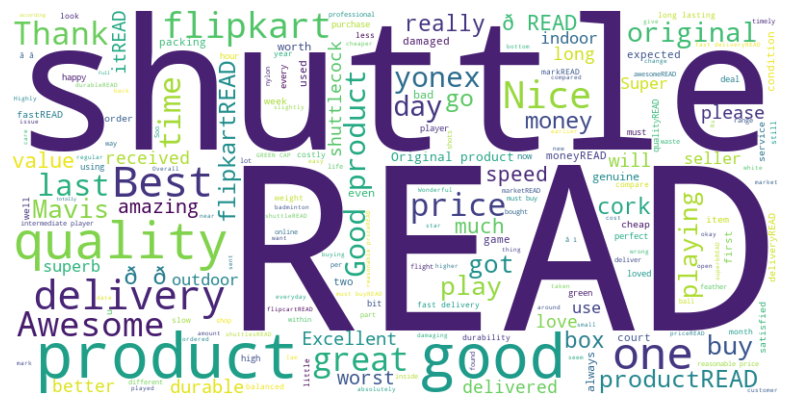

In [42]:
from sklearn.metrics import f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

f1 = f1_score(y_test, y_pred)

print('F1 Score on Test Data (Loaded Model):', f1)
def create_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 400, random_state=42, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

negative_reviews = x_test[y_pred == 0]
text = ' '.join(negative_reviews)
create_wordcloud(text)

In [43]:
new_data = ['received product is in bad condition']
model = joblib.load('good_model.pkl')
prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: [1.]


In [50]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import joblib

nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_text(raw_text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    sentence = re.sub(r'[^\w\s]|[\d]', " ", raw_text)
    sentence = sentence.lower()
    tokens = sentence.split()
    clean_tokens = [t for t in tokens if t not in stop_words]
    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    clean_tokens = " ".join(clean_tokens)
    return clean_tokens

# Assuming 'df' is your DataFrame with 'Review text' and 'Review label' columns
# Upsample the minority class
df_majority = df[df['Review label'] == 0]
df_minority = df[df['Review label'] == 1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

X = df_upsampled['Review text']
Y = df_upsampled['Review label']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)

pipelines = {
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer(preprocessor=preprocess_text)),
        ('classifier', LogisticRegression(max_iter=1000))
    ])
}

param_grids = {
    'logistic_regression': [
        {
            'vectorization__max_features': [1000, 1500, 2000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l2']
        }
    ]
}

best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1,
                               n_jobs=1  
                               )

    grid_search.fit(x_train, y_train)
    best_models[algo] = grid_search.best_estimator_
    best_accuracy = grid_search.best_score_
    y_pred = grid_search.predict(x_test)
    print('Accuracy Score on Test Data: ', accuracy_score(y_test, y_pred))

# Dump the best model
joblib.dump(best_models[algo], 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


********** logistic_regression **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Accuracy Score on Test Data:  0.8963182395260262
Best model saved as 'best_model.pkl'


In [55]:
loaded_model = joblib.load('best_model.pkl')
new_data = ['product is bad']
prediction = loaded_model.predict(new_data)

print("Prediction:", prediction)

Prediction: [1.]
